# getDIEM Optimization

## Clone the GitHub Repository </br>
URL: https://github.com/ftessari23/DIEM/tree/main

In [ ]:
! git clone https://github.com/ftessari23/DIEM.git

Cloning into 'DIEM'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 94 (delta 40), reused 12 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 642.05 KiB | 12.11 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## System Information

#### Import necessary libraries

In [ ]:
import os
import psutil
import time

### System Information

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht sysc
                          all nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xt
                          opology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq
                           ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt
                           aes xsave avx f16c rdrand hypervisor 

In [ ]:
print("System Information:")
print(f"- CPU Count: {psutil.cpu_count(logical=False)} physical, {psutil.cpu_count()} logical")
print(f"- Total Memory: {psutil.virtual_memory().total / (1024**3):.2f} GB")

System Information:
- CPU Count: 1 physical, 2 logical
- Total Memory: 12.67 GB


## Benchmarking Existing Approach
The code is taken as it is from the cloned repository. </br>
<b>Note:</b> Plotting related code is commented to measure the latency more precisely

Import necessary libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

getDiem function </br>
Get DIEM for any two given embeddings

In [ ]:
def getDIEM(synMat1, synMat2, maxV, minV, exp_center, vard): # Plot='off', Text='off', TextSize=10):
    DIEM = (maxV - minV) * (cdist(synMat1.T, synMat2.T, metric='euclidean') - exp_center) / vard
    return DIEM

# Comment this code as this code converts symmetric matx to upper triangular matrix
# Can be considered as post processing
# if np.allclose(DIEM, DIEM.T):
#     DIEM = np.triu(DIEM)
#     DIEM[DIEM == 0] = np.nan

# Comment the plotting code to measure the latency more precisely
# ax = None
# if Plot.lower() == 'on':
#     ax = plotDIEM(DIEM, Text, TextSize, 1.1 * np.nanmin(DIEM), np.nanmax(DIEM))

# return DIEM, ax

In [ ]:
# Parameters
N = 12
minV = 0
maxV = 1

# We generated these values in our local system and added here
exp_center= 1.3944597764116877,
vard= 0.059798367470260454,

In [ ]:
S1 = np.random.rand(N, 1) * (maxV - minV) + minV
S2 = np.random.rand(N, 1) * (maxV - minV) + minV

S1.shape

(12, 1)

In [ ]:
S1= np.expand_dims( pd.read_csv( r"/content/Euclidean_Latency_Evaluation_a.csv" ).values, axis= -1)
S2= np.expand_dims( pd.read_csv( r"/content/Euclidean_Latency_Evaluation_b.csv" ).values, axis= -1)

S1.shape, S2.shape

((100000, 12, 1), (100000, 12, 1))

In [ ]:
getDIEM( synMat1= S1[0], synMat2= S2[0], maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)

array([[-4.32367076]])

In [ ]:
n_runs= int(1e5)

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  temp_S1= S1[i]
  temp_S2= S2[i]

  start_time= time.perf_counter()
  _ = getDIEM( synMat1= temp_S1, synMat2= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
# Convert into pd.DataFrame
df= pd.DataFrame({"Before_Optimization_getDIEM": latencies})
df.shape

(100000, 1)

In [ ]:
df.describe()

,Before_Optimization_getDIEM
count,100000.000000
mean,0.012261
std,0.009671
min,0.007883
25%,0.009068
50%,0.009329
75%,0.012786
max,1.338971


In [ ]:
# Save the pd.DataFrame in '.csv' format
df.to_csv("/content/Before_Optimization_getDIEM.csv", index= None)

## Our Experiments on Latency Optimization

From our experiments on optimizing latency:
1. To convert 2D -> 1D array, we found **Indexing_Latency** approach as the most appropriate.
2. To calculate Euclidean distance between given two vector embeddings, we found **np_dot_Latency** approach as the most appropriate.

Note: Experiment, and code is available in *DIEM_Stat_Optimization.ipynb*

## Proposed Approach

In [ ]:
S1= np.expand_dims( pd.read_csv( r"/content/Euclidean_Latency_Evaluation_a.csv" ).values, axis= -1)
S2= np.expand_dims( pd.read_csv( r"/content/Euclidean_Latency_Evaluation_b.csv" ).values, axis= -1)

S1.shape, S2.shape

((100000, 12, 1), (100000, 12, 1))

#### Optimized getDIEM

In [ ]:
def optimized_getDIEM(a, b, maxV, minV, exp_center, vard):
    x= a[:, 0]- b[:, 0]
    DIEM = (maxV - minV) *(np.sqrt(np.dot(x, x))- exp_center)/ vard
    return DIEM

In [ ]:
n_runs= int(1e5)

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  temp_S1= S1[i]
  temp_S2= S2[i]

  start_time= time.perf_counter()
  _ = optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"optimized_getDIEM": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,optimized_getDIEM
count,100000.000000
mean,0.008976
std,0.009763
min,0.005503
25%,0.006128
50%,0.006562
75%,0.008541
max,1.675554


In [ ]:
df.to_csv( r"optimized_getDIEM.csv", index= None )

#### Lambda Compact Optimized getDIEM

In [ ]:
def lambda_compact_optimized_getDIEM(a, b, maxV, minV, exp_center, vard):
    return (lambda x: (maxV - minV) *(np.sqrt(np.dot(x, x))- exp_center)/ vard)(a[:, 0]- b[:, 0])

In [ ]:
n_runs= int(1e5)

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  temp_S1= S1[i]
  temp_S2= S2[i]

  start_time= time.perf_counter()
  _ = lambda_compact_optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"lambda_compact_optimized_getDIEM": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,lambda_compact_optimized_getDIEM
count,100000.000000
mean,0.010839
std,0.010131
min,0.005739
25%,0.006731
50%,0.007044
75%,0.016122
max,1.862726


In [ ]:
df.to_csv( r"lambda_compact_optimized_getDIEM.csv", index= None )

#### Compact Optimized getDIEM

In [ ]:
def compact_optimized_getDIEM(a, b, maxV, minV, exp_center, vard):
    x= a[:, 0]- b[:, 0]
    return (maxV - minV) *(np.sqrt(np.dot(x, x))- exp_center)/ vard

In [ ]:
n_runs= int(1e5)

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  temp_S1= S1[i]
  temp_S2= S2[i]

  start_time= time.perf_counter()
  _ = compact_optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"compact_optimized_getDIEM": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,compact_optimized_getDIEM
count,100000.000000
mean,0.008059
std,0.009310
min,0.005844
25%,0.006451
50%,0.006586
75%,0.006815
max,1.588964


In [ ]:
df.to_csv( r"compact_optimized_getDIEM.csv", index= None )

#### Display sample outputs using different approaches

In [ ]:
temp_S1= S1[0]
temp_S2= S2[0]
temp_S1.shape, temp_S2.shape

((12, 1), (12, 1))

In [ ]:
getDIEM( synMat1= temp_S1, synMat2= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)

array([[-4.32367076]])

In [ ]:
optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)

array([-4.32367076])

In [ ]:
lambda_compact_optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)

array([-4.32367076])

In [ ]:
compact_optimized_getDIEM( a= temp_S1, b= temp_S2, maxV= maxV, minV= minV, exp_center= exp_center, vard= vard)

array([-4.32367076])

## Comparision of Results

In [133]:
df= pd.read_csv( "/content/Before_Optimization_getDIEM.csv" )
df["Optimized getDIEM"]= pd.read_csv( r"/content/optimized_getDIEM.csv" )
df["Lambda Compact Optimized getDIEM"]= pd.read_csv( r"/content/lambda_compact_optimized_getDIEM.csv" )
df["Compact Optimized getDIEM"]= pd.read_csv( r"/content/compact_optimized_getDIEM.csv" )
df.head( 5 )

,Before_Optimization_getDIEM,Optimized getDIEM,Lambda Compact Optimized getDIEM,Compact Optimized getDIEM
0,0.127115,0.088055,0.095610,0.166707
1,0.034121,0.040910,0.024634,0.029628
2,0.028001,0.016147,0.019822,0.661594
3,0.027946,0.017519,0.021431,0.278684
4,0.021246,0.016943,0.017931,0.023988


In [134]:
df.describe()

,Before_Optimization_getDIEM,Optimized getDIEM,Lambda Compact Optimized getDIEM,Compact Optimized getDIEM
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.012261,0.008976,0.010839,0.008059
std,0.009671,0.009763,0.010131,0.009310
min,0.007883,0.005503,0.005739,0.005844
25%,0.009068,0.006128,0.006731,0.006451
50%,0.009329,0.006562,0.007044,0.006586
75%,0.012786,0.008541,0.016122,0.006815
max,1.338971,1.675554,1.862726,1.588964


In [135]:
def calc_improvement(df, to_compare, compare_with= "Before_Optimization_getDIEM"):
  description= df.describe()
  return (100*(description[compare_with]- description[to_compare])/ description[compare_with]).loc[ ["mean", "std", "min", "max"] ]

In [136]:
improvement_df= pd.DataFrame()
improvement_df["Optimized getDIEM"]= calc_improvement(df= df, to_compare= "Optimized getDIEM" )
improvement_df["Lambda Compact Optimized getDIEM"]= calc_improvement(df= df, to_compare= "Lambda Compact Optimized getDIEM" )
improvement_df["Compact Optimized getDIEM"]= calc_improvement(df= df, to_compare= "Compact Optimized getDIEM" )

In [137]:
print( "Latency Comparision: Existing vs. Proposed" )
improvement_df

Latency Comparision: Existing vs. Proposed


,Optimized getDIEM,Lambda Compact Optimized getDIEM,Compact Optimized getDIEM
mean,26.788132,11.596635,34.266209
std,-0.951255,-4.761738,3.731674
min,30.191550,27.197769,25.865785
max,-25.137438,-39.116232,-18.670531


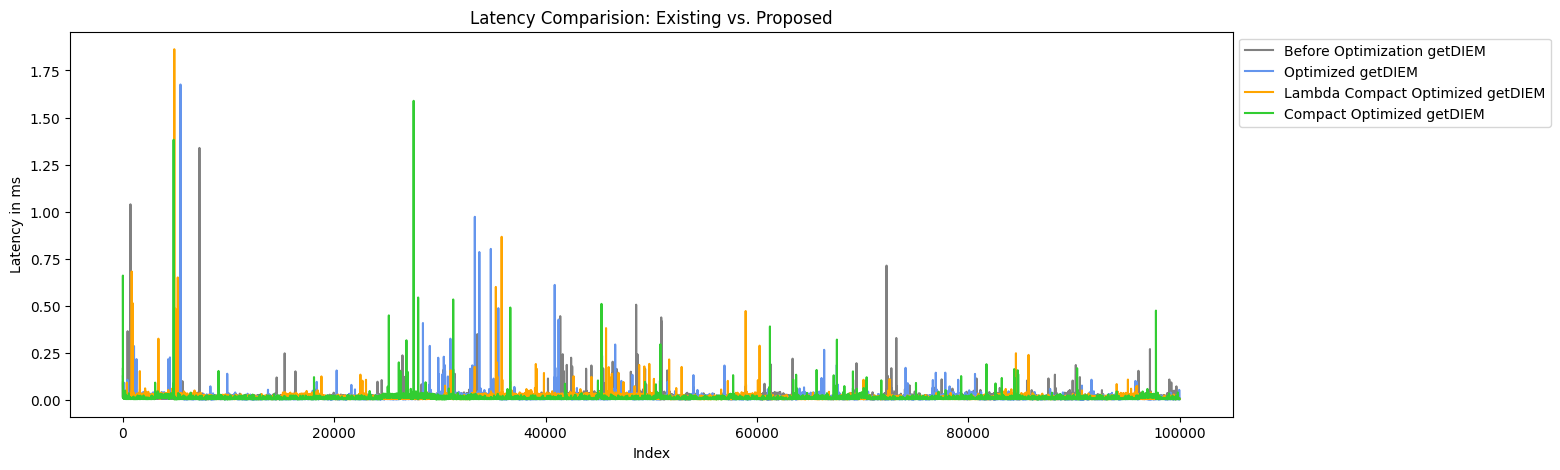

In [138]:
plt.figure( figsize= (15, 5) )

plt.plot( df["Before_Optimization_getDIEM"], color= "gray", label= "Before Optimization getDIEM" )
plt.plot( df["Optimized getDIEM"], color= "cornflowerblue", label= "Optimized getDIEM" )
plt.plot( df["Lambda Compact Optimized getDIEM"], color= "orange", label= "Lambda Compact Optimized getDIEM" )
plt.plot( df["Compact Optimized getDIEM"], color= "limegreen", label= "Compact Optimized getDIEM")

plt.xlabel( "Index" )
plt.ylabel( "Latency in ms" )
plt.legend( **{"bbox_to_anchor": (1, 1), "loc":"upper left"} )
plt.title( "Latency Comparision: Existing vs. Proposed")

plt.show()

In [139]:
description= df.describe().loc[ ["mean", "std", "min", "max"] ]
description

,Before_Optimization_getDIEM,Optimized getDIEM,Lambda Compact Optimized getDIEM,Compact Optimized getDIEM
mean,0.012261,0.008976,0.010839,0.008059
std,0.009671,0.009763,0.010131,0.009310
min,0.007883,0.005503,0.005739,0.005844
max,1.338971,1.675554,1.862726,1.588964


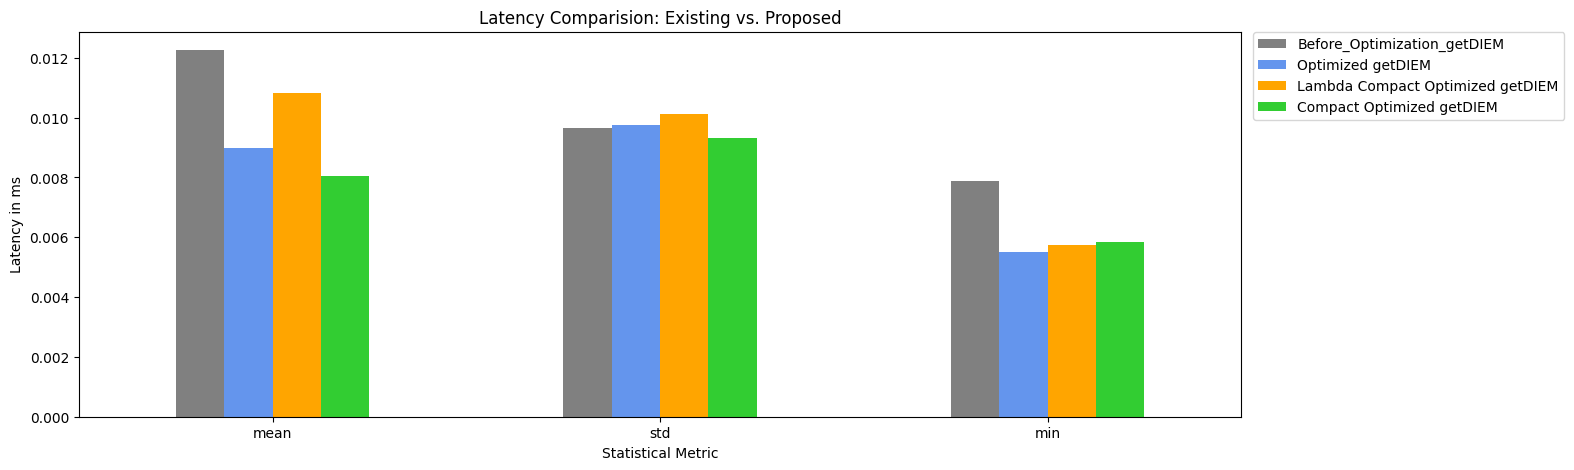

In [140]:
description.drop("max", axis= 0).plot( figsize= (15,5), kind= "bar", color= ["gray", "cornflowerblue", "orange", "limegreen"] )

plt.title( "Latency Comparision: Existing vs. Proposed")
plt.legend( bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0. )


plt.xlabel( "Statistical Metric" )
plt.ylabel( "Latency in ms" )
plt.xticks(rotation=0)
plt.show()

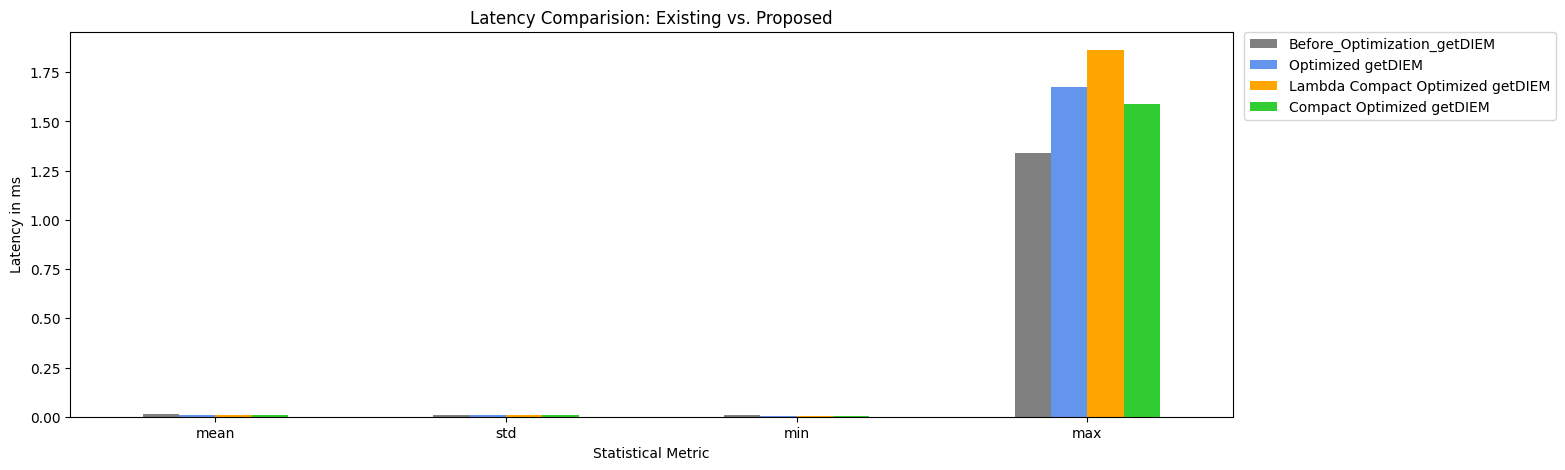

In [141]:
description.plot( figsize= (15,5), kind= "bar", color= ["gray", "cornflowerblue", "orange", "limegreen"] )

plt.title( "Latency Comparision: Existing vs. Proposed")
plt.legend( bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0. )


plt.xlabel( "Statistical Metric" )
plt.ylabel( "Latency in ms" )
plt.xticks(rotation=0)
plt.show()

## Conclusion:
From the above experiments,
</br>
it is concluded that the mean, and standard deviation for recorded latency values are minimum in Compact Optimized getDIEM approach.
</br></br>
Our proposed methodology **'Compact Optimized getDIEM'** optimizes latency of the existing function 'getDIEM' by **34.27%**

## END
_________________________